Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset shape: (807, 8)
   Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999  
Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')


/tmp/ipython-input-4050295737.py:35: RuntimeWarning: overflow encountered in matmul
  gradients = 2/m * X.T @ (X @ theta - y)
/tmp/ipython-input-4050295737.py:35: RuntimeWarning: invalid value encountered in matmul
  gradients = 2/m * X.T @ (X @ theta - y)
/tmp/ipython-input-4050295737.py:36: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * gradients


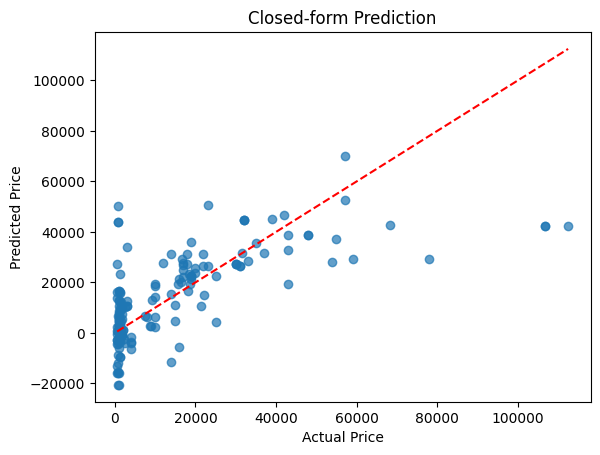

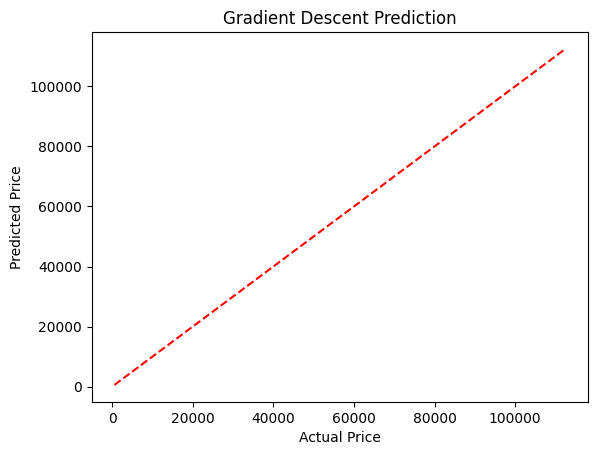

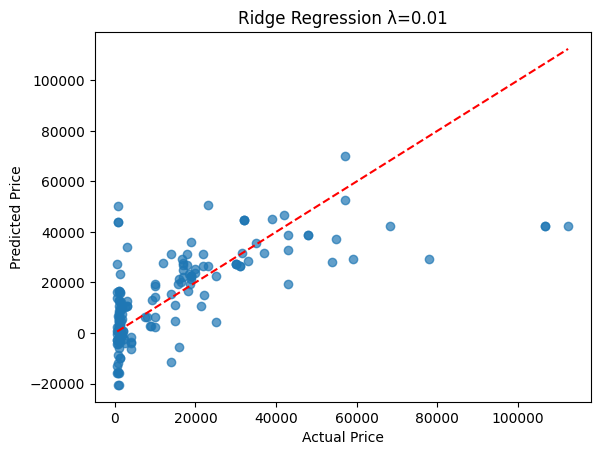

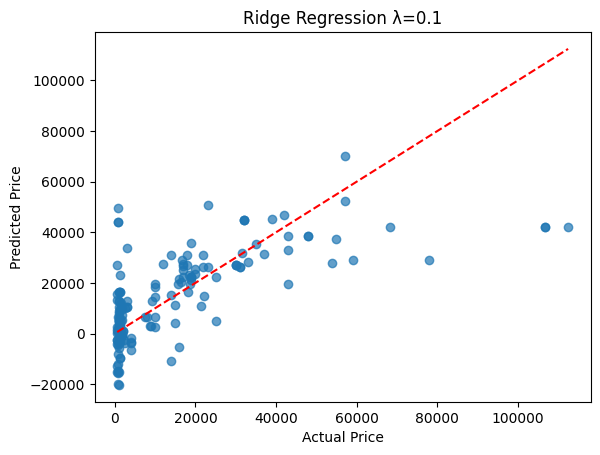

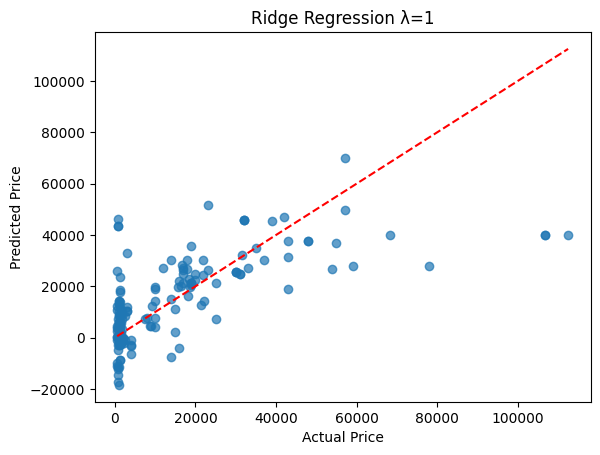

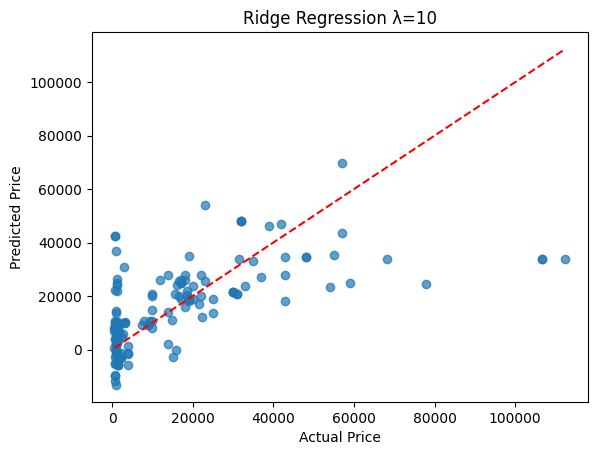

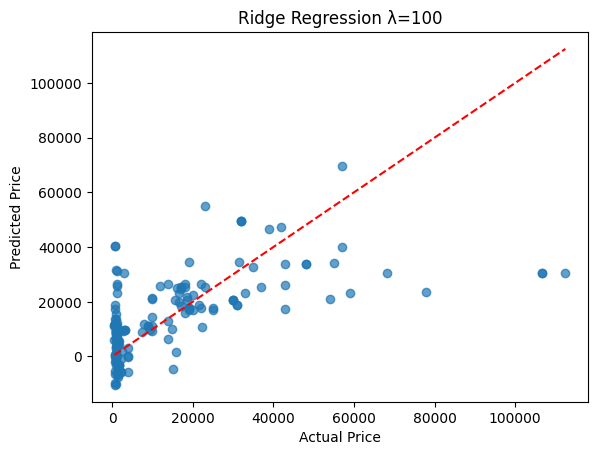

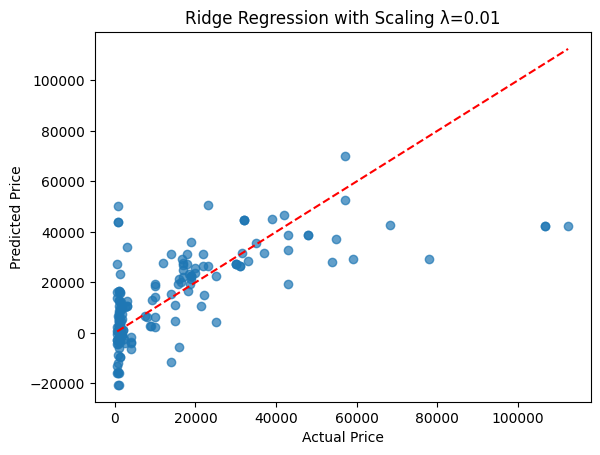

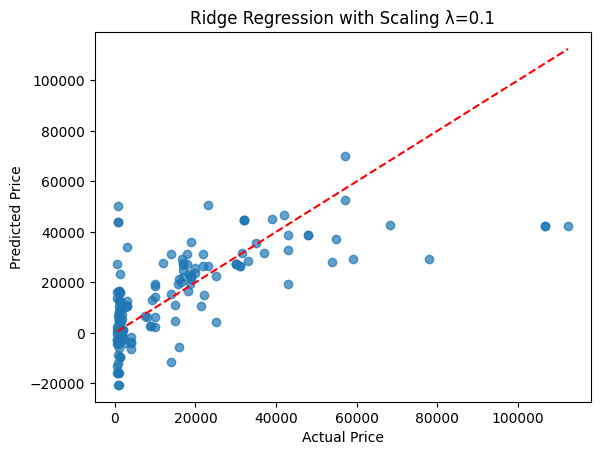

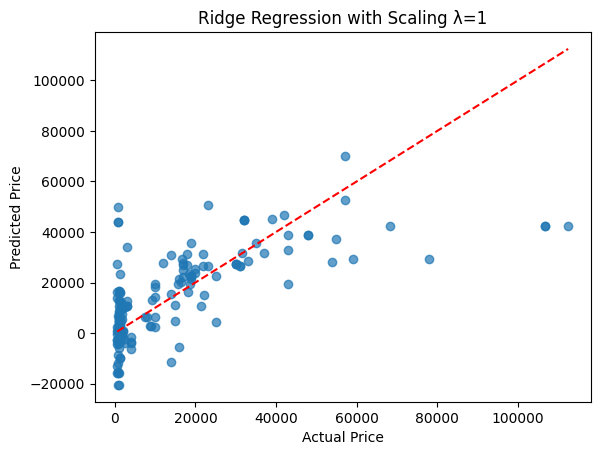

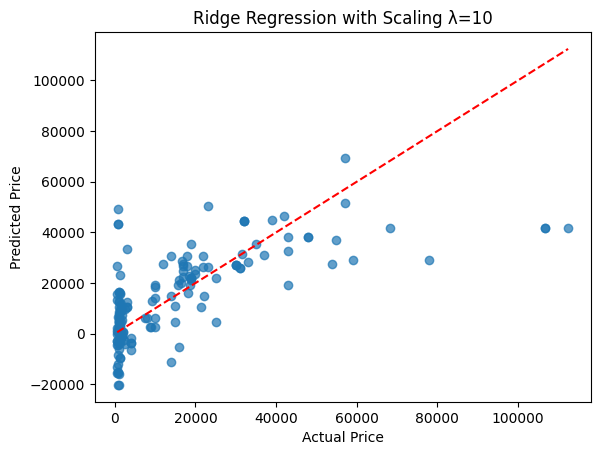

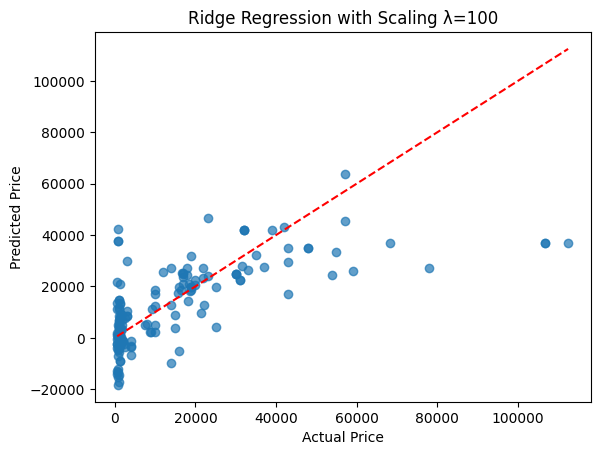

Feature Importance:
          Feature       Weight
0        Ratings  3605.929775
1            RAM  2313.998748
2            ROM   124.351794
6  Battery_Power     3.790320
5      Selfi_Cam    -9.961590
3    Mobile_Size   -72.661336
4    Primary_Cam  -648.580929


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Mobile-Price-Prediction-cleaned_data.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print(df.head())
print(df.columns)

# Use the already loaded dataframe 'df' instead of trying to load 'mobile_price_prediction.csv'
X = df.drop('Price', axis=1).values
y = df['Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

theta_closed = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_closed = X_test_b @ theta_closed

def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for i in range(epochs):
        gradients = 2/m * X.T @ (X @ theta - y)
        theta -= lr * gradients
    return theta

theta_gd = gradient_descent(X_train_b, y_train)
y_pred_gd = X_test_b @ theta_gd

def plot_pred_vs_actual(y_true, y_pred, title):
    plt.figure()
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.show()

plot_pred_vs_actual(y_test, y_pred_closed, "Closed-form Prediction")
plot_pred_vs_actual(y_test, y_pred_gd, "Gradient Descent Prediction")

lambdas = [0.01, 0.1, 1, 10, 100]
weights = []

for lam in lambdas:
    theta_ridge = np.linalg.inv(X_train_b.T @ X_train_b + lam * np.identity(X_train_b.shape[1])) @ X_train_b.T @ y_train
    y_pred_ridge = X_test_b @ theta_ridge
    weights.append(theta_ridge)
    plot_pred_vs_actual(y_test, y_pred_ridge, f"Ridge Regression λ={lam}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

for lam in lambdas:
    theta_ridge_scaled = np.linalg.inv(X_train_scaled_b.T @ X_train_scaled_b + lam * np.identity(X_train_scaled_b.shape[1])) @ X_train_scaled_b.T @ y_train
    y_pred_ridge_scaled = X_test_scaled_b @ theta_ridge_scaled
    plot_pred_vs_actual(y_test, y_pred_ridge_scaled, f"Ridge Regression with Scaling λ={lam}")

feature_importance = pd.DataFrame({'Feature': df.drop('Price', axis=1).columns, 'Weight': theta_ridge[1:].flatten()})
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)
print("Feature Importance:\n", feature_importance)

λ=0.01, Accuracy: 0.9855
λ=0.1, Accuracy: 0.9855
λ=1, Accuracy: 0.9855
λ=10, Accuracy: 0.9855
λ=100, Accuracy: 0.9782


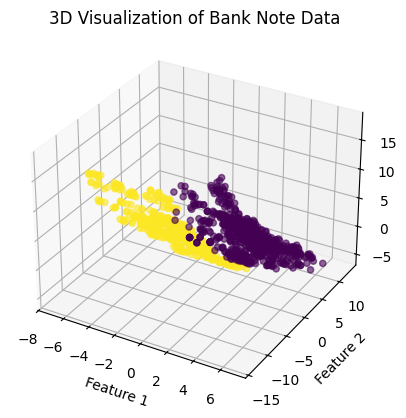

Accuracy after outlier injection: 0.9709090909090909


In [10]:
data_path_2 = "/content/drive/My Drive/BankNote_Authentication.csv" # Corrected path
data_2 = pd.read_csv(data_path_2)


X2 = data_2.drop('class', axis=1).values # Corrected variable name
y2 = data_2['class'].values # Corrected variable name

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

for lam in lambdas:
    clf = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=1000)
    clf.fit(X2_train, y2_train)
    y2_pred = clf.predict(X2_test)
    print(f"λ={lam}, Accuracy: {accuracy_score(y2_test, y2_pred):.4f}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2_train[:,0], X2_train[:,1], X2_train[:,2], c=y2_train, cmap='viridis', alpha=0.6)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D Visualization of Bank Note Data")
plt.show()

X2_train_outliers = X2_train.copy()
X2_train_outliers[:10] += np.random.uniform(10, 15, size=X2_train_outliers[:10].shape)

clf_outlier = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=1000)
clf_outlier.fit(X2_train_outliers, y2_train)
y2_pred_outlier = clf_outlier.predict(X2_test)
print("Accuracy after outlier injection:", accuracy_score(y2_test, y2_pred_outlier))